In [1]:
import pandas as pd
import numpy as np
import os
import glob
folders_1 = os.listdir('data/금융사기용의자의 연령대별 지역데이터')
folders_2 = os.listdir('data/금융사기피해자의 연령대별 지역데이터')

def make_csv(folders,folderpath):
    with open(folderpath[:-1]+'.csv', 'w',encoding='UTF-8') as outfile:
        for filename in folders:
            with open(folderpath+filename, encoding='UTF-8') as file:        
                outfile.write(file.read())


make_csv(folders_1,"data/금융사기용의자의 연령대별 지역데이터/")
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
make_csv(folders_2,'data/금융사기피해자의 연령대별 지역데이터/')
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)

In [2]:
a = list(df_victim_origin['생년구간'].unique()) #2090-2100 2070-2080 => 각각 1개 5개 제외
a.remove ('2090-2100')
a.remove('2070-2080')
a= sorted(a)


b = list(df_suspect_origin['생년구간'].unique()) # 2080-2090 => 1개 제외
b.remove('2080-2090')
b = sorted(b)

DF = [[]for _ in range(len(b))]
for i in range (0, len(b)):
    DF[i].append(b[i])


suspect_DF = pd.DataFrame(columns=['생년구간'], data=DF)
victim_DF = pd.DataFrame(columns=['생년구간'], data=DF)
def return_cnt(dataframe, row):
    temp = dataframe[(dataframe['생년구간']==row['생년구간'])]
    return temp['생년구간'].count()

suspect_DF['발생건수'] = suspect_DF.apply(lambda x: return_cnt(df_suspect_origin,x),axis=1)
victim_DF['발생건수'] = victim_DF.apply(lambda x: return_cnt(df_victim_origin,x),axis=1)

In [3]:
suspect_DF

,생년구간,발생건수
0,1900-1910,5
1,1910-1920,6
2,1930-1940,91
3,1940-1950,49
4,1950-1960,188
5,1960-1970,842
6,1970-1980,1602
7,1980-1990,2984
8,1990-2000,12344
9,2000-2010,13469


In [32]:
victim_DF

,생년구간,발생건수
0,1900-1910,67
1,1910-1920,72
2,1930-1940,47
3,1940-1950,294
4,1950-1960,1049
5,1960-1970,3865
6,1970-1980,13807
7,1980-1990,38274
8,1990-2000,72435
9,2000-2010,101591


# 초기분석

# 피해자 피의자 막대그래프

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

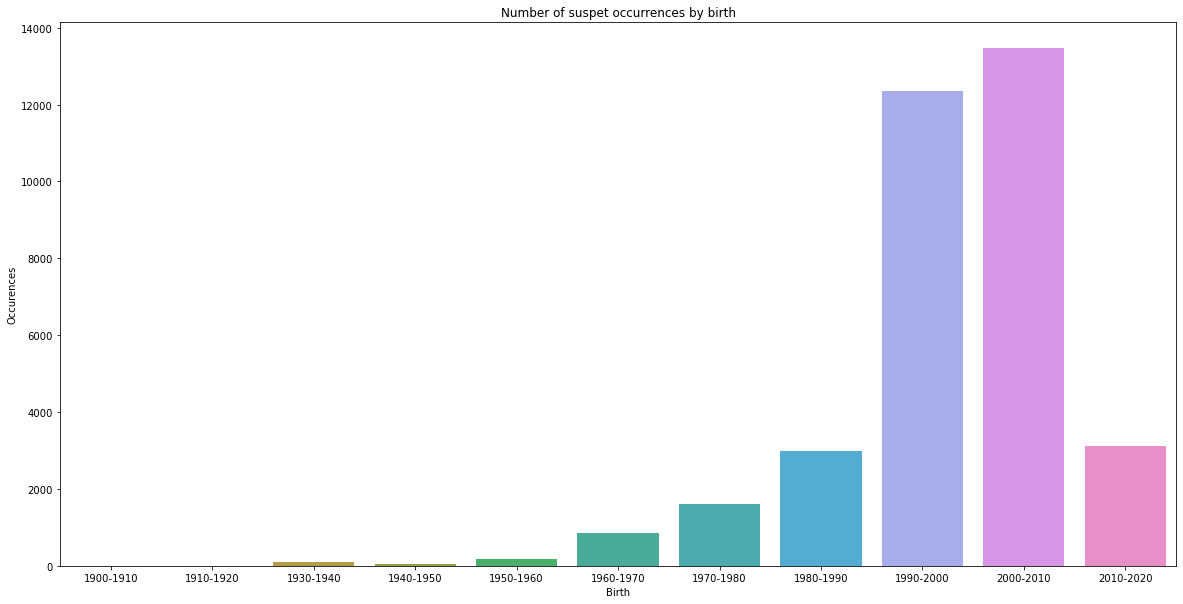

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(x='생년구간', y='발생건수', data=suspect_DF)
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('Number of suspet occurrences by birth')
plt.show()

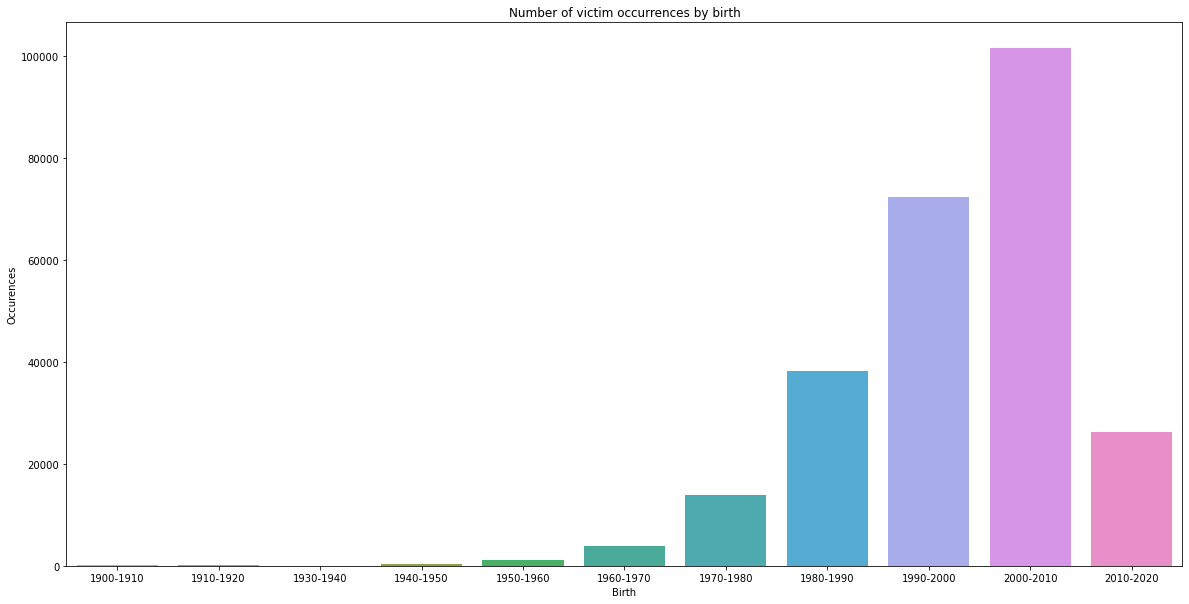

In [19]:
plt.figure(figsize=(20, 10))
sns.barplot(x='생년구간', y='발생건수', data=victim_DF)
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('Number of victim occurrences by birth')
plt.show()

# 생년구간과 발생건수의 상관관계(생년구간의 중앙값과 발생건수)

In [27]:
temp_suspect=suspect_DF.copy()
temp_victim=victim_DF.copy()

In [28]:
def change_birth(row):
    return int(row[0:4])+5
temp_suspect['생년구간']=temp_suspect['생년구간'].apply(change_birth)
temp_victim['생년구간']=temp_victim['생년구간'].apply(change_birth)

## 1. 피의자

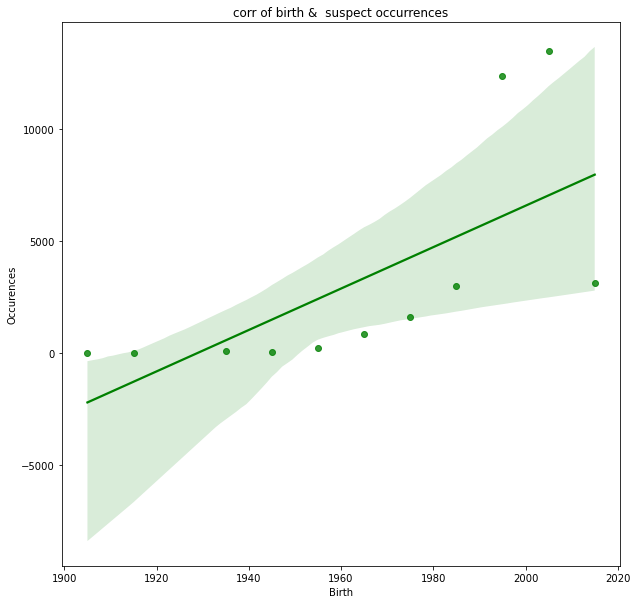

In [24]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=temp_suspect['생년구간'], y=temp_suspect['발생건수'], fit_reg=True, color='g')
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('corr of birth &  suspect occurrences')
plt.show()

In [25]:
from scipy import stats

In [26]:
print(stats.pearsonr(temp_suspect['생년구간'], temp_suspect['발생건수']))

(0.6702537825895382, 0.024019549278497147)


## 2. 피해자

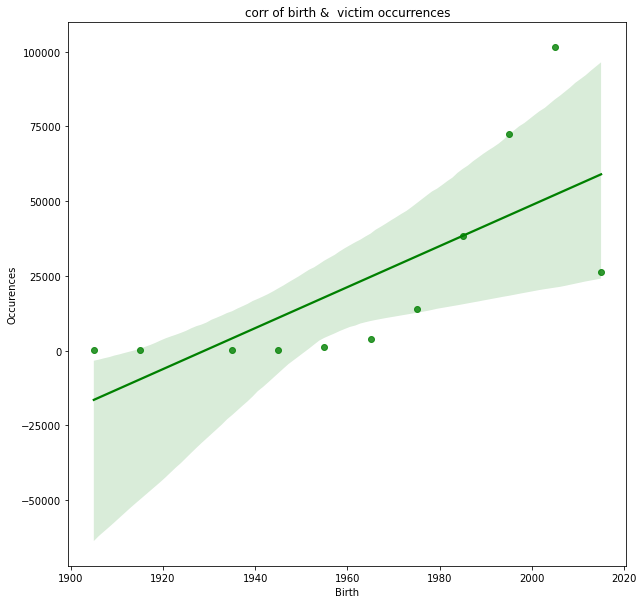

In [29]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=temp_victim['생년구간'], y=temp_victim['발생건수'], fit_reg=True, color='g')
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('corr of birth &  victim occurrences')
plt.show()

In [30]:
print(stats.pearsonr(temp_victim['생년구간'], temp_victim['발생건수']))

(0.7163211884360393, 0.013145143872812272)


# 준비과정
## 생년구간과의 match만약 생년월일을 나이로 바꾸었을때
## 만나이는 계산불가능 따라서 일반 나이를 따름
## 2023년 기준으로
## 1. 13~22
## 2. 23~32 이런식으로 나이가 바뀜

## 따라서 칼럼을 이어붙이는 기준에서 걸침
## ex> 23 ~ 32는 15 ~ 29에도 포함되고 30 ~ 49에도 포함됨, 따라서 그 나이구간의 중앙값을 그 나이라고 가정하고 컬럼을 이어붙인다. 

In [19]:
def cut1(row):
    return 2023-int(row[0:4])+5

In [20]:
suspect_DF['생년구간new']=suspect_DF['생년구간'].apply(cut1)
victim_DF['생년구간new']=victim_DF['생년구간'].apply(cut1)

In [21]:
suspect_DF

,생년구간,발생건수,생년구간new
0,1900-1910,5,128
1,1910-1920,6,118
2,1930-1940,91,98
3,1940-1950,49,88
4,1950-1960,188,78
5,1960-1970,842,68
6,1970-1980,1602,58
7,1980-1990,2984,48
8,1990-2000,12344,38
9,2000-2010,13469,28


In [22]:
victim_DF

,생년구간,발생건수,생년구간new
0,1900-1910,67,128
1,1910-1920,72,118
2,1930-1940,47,98
3,1940-1950,294,88
4,1950-1960,1049,78
5,1960-1970,3865,68
6,1970-1980,13807,58
7,1980-1990,38274,48
8,1990-2000,72435,38
9,2000-2010,101591,28


# 1. 내외국인 국제이동
## 1. 내국인
### 1 총이동
### 2 입국자
### 3 출국자
### 4 국제순이동

In [37]:
move=pd.read_csv("./데이터/내외국인_성_연령별_국제이동_월간__연간__20230508232143(2021).csv", encoding='cp949')

In [38]:
move

,내외국인별,성별,연령별,총이동,입국자,출국자,국제순이동
0,내국인,계,0세,3508,1307,2201,-894
1,내국인,계,1세,4218,1664,2554,-890
2,내국인,계,2세,3657,1632,2025,-393
3,내국인,계,3세,3648,1556,2092,-536
4,내국인,계,4세,3604,1489,2115,-626
...,...,...,...,...,...,...,...
167,외국인,계,81세,216,112,104,8
168,외국인,계,82세,186,110,76,34
169,외국인,계,83세,149,78,71,7
170,외국인,계,84세,113,70,43,27


In [45]:
def make_age(row):
    try:
        row=row.replace("세",'')
        return int(row)
    except:
        row=row.replace("이상",'')
        return int(row)
move['연령별']=move['연령별'].apply(make_age)

In [46]:
move

,내외국인별,성별,연령별,총이동,입국자,출국자,국제순이동
0,내국인,계,0,3508,1307,2201,-894
1,내국인,계,1,4218,1664,2554,-890
2,내국인,계,2,3657,1632,2025,-393
3,내국인,계,3,3648,1556,2092,-536
4,내국인,계,4,3604,1489,2115,-626
...,...,...,...,...,...,...,...
167,외국인,계,81,216,112,104,8
168,외국인,계,82,186,110,76,34
169,외국인,계,83,149,78,71,7
170,외국인,계,84,113,70,43,27


In [49]:
def make_move(row, move, option1, option2):
    if row.생년구간new >= 85:
        df=move[(move['내외국인별']==option1)&(move['연령별']==85)]
        return df[option2].values[0]
    else:
        df=move[(move['내외국인별']==option1)&(move['연령별']==row.생년구간new)]
        return df[option2].values[0]

In [52]:
suspect_DF['내국인총이동']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','총이동'),axis=1)
suspect_DF['내국인입국자']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','입국자'),axis=1)
suspect_DF['내국인출국자']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','출국자'),axis=1)
suspect_DF['내국인국제순이동']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','국제순이동'),axis=1)
suspect_DF['외국인총이동']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','총이동'),axis=1)
suspect_DF['외국인입국자']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','입국자'),axis=1)
suspect_DF['외국인출국자']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','출국자'),axis=1)
suspect_DF['외국인국제순이동']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','국제순이동'),axis=1)

In [54]:
victim_DF['내국인총이동']=victim_DF.apply(lambda x: make_move(x,move,'내국인','총이동'),axis=1)
victim_DF['내국인입국자']=victim_DF.apply(lambda x: make_move(x,move,'내국인','입국자'),axis=1)
victim_DF['내국인출국자']=victim_DF.apply(lambda x: make_move(x,move,'내국인','출국자'),axis=1)
victim_DF['내국인국제순이동']=victim_DF.apply(lambda x: make_move(x,move,'내국인','국제순이동'),axis=1)
victim_DF['외국인총이동']=victim_DF.apply(lambda x: make_move(x,move,'외국인','총이동'),axis=1)
victim_DF['외국인입국자']=victim_DF.apply(lambda x: make_move(x,move,'외국인','입국자'),axis=1)
victim_DF['외국인출국자']=victim_DF.apply(lambda x: make_move(x,move,'외국인','출국자'),axis=1)
victim_DF['외국인국제순이동']=victim_DF.apply(lambda x: make_move(x,move,'외국인','국제순이동'),axis=1)

In [57]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000


In [58]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000


# 2. 연령별 소득(2021)
## 1. 평균소득
## 2. 중위소득

In [62]:
earn=pd.read_csv("./데이터/산업대분류별_연령별_소득_20230508235752(2021).csv", encoding='cp949')

In [64]:
def change_age(row):
    return int(row[0:2])
earn['연령대별']=earn['연령대별'].apply(change_age)

In [65]:
earn

,산업대분류별,연령대별,평균소득,중위소득
0,총 계,19,89,56
1,총 계,20,180,189
2,총 계,25,271,250
3,총 계,30,333,300
4,총 계,35,388,336
5,총 계,40,413,343
6,총 계,45,414,306
7,총 계,50,407,273
8,총 계,55,365,240
9,총 계,60,273,197


In [66]:
tempdf=suspect_DF.copy()

In [67]:
def synchronization(row):
    if row >= 65:
        return 65
    elif row >= 60:
        return 60
    elif row >= 55:
        return 55
    elif row >= 50:
        return 50
    elif row >= 45:
        return 45
    elif row >= 40:
        return 40
    elif row >= 35:
        return 35
    elif row >= 30:
        return 30
    elif row >= 25:
        return 25
    elif row >= 20:
        return 20
    else:
        return 19
tempdf['생년구간new']=tempdf['생년구간new'].apply(synchronization)

In [68]:
def make_earn(row,earn,option):
    df=earn[earn['연령대별']==row.생년구간new]
    return df[option].values[0]

In [69]:
suspect_DF['평균소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)
suspect_DF['중위소득']=tempdf.apply(lambda x: make_earn(x, earn, '중위소득'),axis=1)
victim_DF['평균소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)
victim_DF['중위소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)

In [71]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389,0.482506,0.670560
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.415862
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.642112
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.627661
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.650610
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,-0.103784
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.599478
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.237808
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.818048
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.701978


In [72]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227,0.515666,0.515666
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.345764
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.517056
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.519326
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.509929
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,0.060691
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.526434
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.192376
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.733666
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.652410


# 3. 퇴직연금제도가입
## 1. 가입 대상 근로자 수 (명)	
## 2 가입 근로자 수 (명)	
## 3 가입률 (%)

In [84]:
pension=pd.read_csv("./데이터/성별_연령별_퇴직연금제도_가입률_20230508233640(2021).csv",encoding='cp949')

In [85]:
pension

,연령별(1),가입 대상 근로자 수 (명),가입 근로자 수 (명),가입률 (%)
0,20세 미만,17645,4007,22.7
1,20 - 24세,292172,117350,40.2
2,25 - 29세,1103887,592129,53.6
3,30 - 34세,1328747,805084,60.6
4,35 - 39세,1453232,891890,61.4
5,40 - 44세,1567695,927022,59.1
6,45 - 49세,1582980,879746,55.6
7,50 - 54세,1606672,863578,53.7
8,55 - 59세,1278972,650797,50.9
9,60 - 64세,916070,373195,40.7


In [90]:
def change_age2(row):
    if('미만' in row):
        return 19
    else:
        return int(row[0:2])
pension['연령별(1)']=pension['연령별(1)'].apply(change_age2)

In [91]:
pension

,연령별(1),가입 대상 근로자 수 (명),가입 근로자 수 (명),가입률 (%)
0,19,17645,4007,22.7
1,20,292172,117350,40.2
2,25,1103887,592129,53.6
3,30,1328747,805084,60.6
4,35,1453232,891890,61.4
5,40,1567695,927022,59.1
6,45,1582980,879746,55.6
7,50,1606672,863578,53.7
8,55,1278972,650797,50.9
9,60,916070,373195,40.7


### tempdf랑 연령 형식 똑같음

In [94]:
def make_pension(row, pension, option):
    df = pension[pension['연령별(1)']==row.생년구간new]
    return df[option].values[0]

In [97]:
suspect_DF['퇴직연금가입대상근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 대상 근로자 수 (명)'),axis=1)
suspect_DF['퇴직연금가입근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 근로자 수 (명)'),axis=1)
suspect_DF['가입률']=tempdf.apply(lambda x: make_pension(x, pension, '가입률 (%)'),axis=1)
victim_DF['퇴직연금가입대상근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 대상 근로자 수 (명)'),axis=1)
victim_DF['퇴직연금가입근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 근로자 수 (명)'),axis=1)
victim_DF['가입률']=tempdf.apply(lambda x: make_pension(x, pension, '가입률 (%)'),axis=1)

In [98]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389,0.482506,0.670560,0.389456,0.590040,0.709335
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.415862,-0.094666,-0.368354,-0.436884
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.642112,0.307134,0.580095,0.664973
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.627661,0.286974,0.571010,0.644641
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.650610,0.324507,0.583785,0.679164
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,-0.103784,-0.187073,-0.052577,-0.163150
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.599478,0.290309,0.545719,0.650528
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.237808,-0.116922,0.187534,0.277327
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.818048,0.611859,0.771595,0.869802
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.701978,-0.847193,-0.702299,-0.719644


In [99]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227,0.515666,0.515666,0.409730,0.613793,0.725351
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.345764,-0.094666,-0.368354,-0.436884
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.517056,0.307134,0.580095,0.664973
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.519326,0.286974,0.571010,0.644641
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.509929,0.324507,0.583785,0.679164
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,0.060691,-0.187073,-0.052577,-0.163150
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.526434,0.290309,0.545719,0.650528
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.192376,-0.116922,0.187534,0.277327
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.733666,0.611859,0.771595,0.869802
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.652410,-0.847193,-0.702299,-0.719644


# 4. 구직급여 신청자수(2022 4분기) 평균

In [143]:
job_search=pd.read_csv("./데이터/연령별_구직급여_신청자수_분기__20230508232810(2022).csv", encoding='cp949')

In [144]:
job_search['구직급여신청자수']=(job_search['2022.1/4']+job_search['2022.2/4']+job_search['2022.3/4']+job_search['2022.4/4'])//4

In [145]:
job_search['연령별']=job_search['연령별'].apply(change_age)

In [146]:
job_search

,연령별,2022.1/4,2022.2/4,2022.3/4,2022.4/4,구직급여신청자수
0,20,71895,50356,48323,46409,54245
1,30,66622,48906,45659,45709,51724
2,40,75057,49673,47915,48220,55216
3,50,90333,59482,56853,60327,66748
4,60,109514,53751,62398,60542,71551


In [147]:
def synchronization2(row):
    if row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 20

In [148]:
tempdf2=suspect_DF.copy()

In [149]:
tempdf2['생년구간new']=tempdf2['생년구간new'].apply(synchronization2)

In [150]:
def make_jobsearch(row, job_search):
    df = job_search[job_search['연령별']==row.생년구간new]
    return df['구직급여신청자수'].values[0]


In [151]:
suspect_DF['구직급여신청자수']=tempdf2.apply(lambda x: make_jobsearch(x, job_search),axis=1)
victim_DF['구직급여신청자수']=tempdf2.apply(lambda x: make_jobsearch(x, job_search),axis=1)

In [153]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389,0.482506,0.670560,0.389456,0.590040,0.709335,-0.807185
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.415862,-0.094666,-0.368354,-0.436884,0.847348
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.642112,0.307134,0.580095,0.664973,-0.969842
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.627661,0.286974,0.571010,0.644641,-0.981849
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.650610,0.324507,0.583785,0.679164,-0.948692
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,-0.103784,-0.187073,-0.052577,-0.163150,-0.194223
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.599478,0.290309,0.545719,0.650528,-0.863393
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.237808,-0.116922,0.187534,0.277327,-0.818884
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.818048,0.611859,0.771595,0.869802,-0.735427
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.701978,-0.847193,-0.702299,-0.719644,-0.030169


In [154]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227,0.515666,0.515666,0.409730,0.613793,0.725351,-0.852970
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.345764,-0.094666,-0.368354,-0.436884,0.847348
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.517056,0.307134,0.580095,0.664973,-0.969842
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.519326,0.286974,0.571010,0.644641,-0.981849
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.509929,0.324507,0.583785,0.679164,-0.948692
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,0.060691,-0.187073,-0.052577,-0.163150,-0.194223
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.526434,0.290309,0.545719,0.650528,-0.863393
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.192376,-0.116922,0.187534,0.277327,-0.818884
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.733666,0.611859,0.771595,0.869802,-0.735427
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.652410,-0.847193,-0.702299,-0.719644,-0.030169


# 5. 비임금 근로자(2022)

In [155]:
nopay=pd.read_csv("./데이터/연령별_비임금_근로자_20230508233213(2022).csv",encoding='cp949')

In [157]:
nopay['연령별']=nopay['연령별'].apply(change_age)

In [158]:
nopay

,연령별,비임금근로자
0,15,239
1,30,810
2,40,1347
3,50,1754
4,60,2536


In [159]:
def synchronization3(row):
    if row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 15

In [160]:
tempdf3=suspect_DF.copy()

In [161]:
tempdf3['생년구간new']=tempdf3['생년구간new'].apply(synchronization3)

In [162]:
def make_nopay(row, nopay):
    df = nopay[nopay['연령별']==row.생년구간new]
    return df['비임금근로자'].values[0]

In [163]:
suspect_DF['비임금근로자']=tempdf3.apply(lambda x: make_nopay(x, nopay),axis=1)
victim_DF['비임금근로자']=tempdf3.apply(lambda x: make_nopay(x, nopay),axis=1)

In [165]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389,0.482506,0.670560,0.389456,0.590040,0.709335,-0.807185,-0.794840
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.415862,-0.094666,-0.368354,-0.436884,0.847348,0.878579
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.642112,0.307134,0.580095,0.664973,-0.969842,-0.957268
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.627661,0.286974,0.571010,0.644641,-0.981849,-0.964180
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.650610,0.324507,0.583785,0.679164,-0.948692,-0.941353
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,-0.103784,-0.187073,-0.052577,-0.163150,-0.194223,-0.140465
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.599478,0.290309,0.545719,0.650528,-0.863393,-0.921269
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.237808,-0.116922,0.187534,0.277327,-0.818884,-0.932301
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.818048,0.611859,0.771595,0.869802,-0.735427,-0.730332
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.701978,-0.847193,-0.702299,-0.719644,-0.030169,-0.160103


In [166]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227,0.515666,0.515666,0.409730,0.613793,0.725351,-0.852970,-0.843563
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.345764,-0.094666,-0.368354,-0.436884,0.847348,0.878579
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.517056,0.307134,0.580095,0.664973,-0.969842,-0.957268
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.519326,0.286974,0.571010,0.644641,-0.981849,-0.964180
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.509929,0.324507,0.583785,0.679164,-0.948692,-0.941353
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,0.060691,-0.187073,-0.052577,-0.163150,-0.194223,-0.140465
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.526434,0.290309,0.545719,0.650528,-0.863393,-0.921269
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.192376,-0.116922,0.187534,0.277327,-0.818884,-0.932301
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.733666,0.611859,0.771595,0.869802,-0.735427,-0.730332
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.652410,-0.847193,-0.702299,-0.719644,-0.030169,-0.160103


# 5 정규직 인원(2021)

In [167]:
full=pd.read_csv("./데이터/연령별_정규직_인원_현황_20230508231052(2021).csv", encoding='cp949')

In [169]:
full.drop(columns=['산업별(2)'],inplace=True)

In [172]:
full=full.iloc[1:,:]

In [175]:
full

,산업별(1),만 29세 이하 (명),만 30~39세 (명),만 40~49세 (명),만 50세 이상 (명)
1,제조,27,51,48,38
2,제조,80,165,145,97
3,제조,372,839,701,476
4,금융,33,66,37,13
5,금융,97,194,162,73
6,금융,169,607,506,211
7,비금융,35,60,48,28
8,비금융,73,133,122,100
9,비금융,195,587,570,365


In [203]:
def makedf(option,full):
    count=1
    df={'산업':option, 29:0, 30:0, 40:0, 50:0}
    for i in [29, 30, 40, 50]:
        temp=full[full['산업별(1)']==option].sum()[count]
        count+=1
        df[i]=temp
    df=pd.DataFrame(df,index=[0])
    return df

In [204]:
df1=makedf('제조',full)
df2=makedf('금융',full)
df3=makedf('비금융',full)

In [212]:
full=(df1.append(df2)).append(df3)

In [213]:
full

,산업,29,30,40,50
0,제조,479,1055,894,611
0,금융,299,867,705,297
0,비금융,303,780,740,493


In [210]:
tempdf4=suspect_DF.copy()

In [211]:
def synchronization4(row):
    if row>=50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 29
tempdf4['생년구간new']=tempdf4['생년구간new'].apply(synchronization4)

In [215]:
def make_full(row, full, option):
    df=full[(full['산업']==option)]
    if row.생년구간new == 29:
        return df[29]
    elif row.생년구간new == 30:
        return df[30]
    elif row.생년구간new == 40:
        return df[40]
    else:
        return df[50]
    
suspect_DF['제조정규직']=tempdf4.apply(lambda x: make_full(x, full, '제조'), axis=1)
suspect_DF['금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '금융'), axis=1)
suspect_DF['비금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '비금융'), axis=1)
victim_DF['제조정규직']=tempdf4.apply(lambda x: make_full(x, full, '제조'), axis=1)
victim_DF['금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '금융'), axis=1)
victim_DF['비금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '비금융'), axis=1)

In [217]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자,제조정규직,금융정규직,비금융정규직
발생건수,1.000000,-0.670254,0.895214,0.852727,0.929503,-0.376449,0.809351,0.575156,0.868283,-0.392389,0.482506,0.670560,0.389456,0.590040,0.709335,-0.807185,-0.794840,0.315131,0.520398,0.088589
생년구간new,-0.670254,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.415862,-0.094666,-0.368354,-0.436884,0.847348,0.878579,-0.128953,-0.376339,0.062168
내국인총이동,0.895214,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.642112,0.307134,0.580095,0.664973,-0.969842,-0.957268,0.292348,0.555072,0.069826
내국인입국자,0.852727,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.627661,0.286974,0.571010,0.644641,-0.981849,-0.964180,0.307184,0.570404,0.088548
내국인출국자,0.929503,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.650610,0.324507,0.583785,0.679164,-0.948692,-0.941353,0.274705,0.534468,0.050363
내국인국제순이동,-0.376449,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,-0.103784,-0.187073,-0.052577,-0.163150,-0.194223,-0.140465,0.174907,0.198926,0.199243
외국인총이동,0.809351,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.599478,0.290309,0.545719,0.650528,-0.863393,-0.921269,0.113653,0.356010,-0.083720
외국인입국자,0.575156,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.237808,-0.116922,0.187534,0.277327,-0.818884,-0.932301,-0.098742,0.171472,-0.296318
외국인출국자,0.868283,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.818048,0.611859,0.771595,0.869802,-0.735427,-0.730332,0.288767,0.457701,0.130292
외국인국제순이동,-0.392389,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.701978,-0.847193,-0.702299,-0.719644,-0.030169,-0.160103,-0.447436,-0.350776,-0.477015


In [218]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자,제조정규직,금융정규직,비금융정규직
발생건수,1.000000,-0.716321,0.934027,0.896172,0.963300,-0.325608,0.857104,0.633484,0.896841,-0.362227,0.515666,0.515666,0.409730,0.613793,0.725351,-0.852970,-0.843563,0.259079,0.493014,0.046798
생년구간new,-0.716321,1.000000,-0.865954,-0.882926,-0.840788,-0.238272,-0.859430,-0.865807,-0.684947,-0.140801,-0.345764,-0.345764,-0.094666,-0.368354,-0.436884,0.847348,0.878579,-0.128953,-0.376339,0.062168
내국인총이동,0.934027,-0.865954,1.000000,0.995346,0.995303,0.023550,0.937750,0.827536,0.856268,-0.102461,0.517056,0.517056,0.307134,0.580095,0.664973,-0.969842,-0.957268,0.292348,0.555072,0.069826
내국인입국자,0.896172,-0.882926,0.995346,1.000000,0.981341,0.119783,0.937072,0.856071,0.828572,-0.038712,0.519326,0.519326,0.286974,0.571010,0.644641,-0.981849,-0.964180,0.307184,0.570404,0.088548
내국인출국자,0.963300,-0.840788,0.995303,0.981341,1.000000,-0.073341,0.929641,0.791114,0.876065,-0.165539,0.509929,0.509929,0.324507,0.583785,0.679164,-0.948692,-0.941353,0.274705,0.534468,0.050363
내국인국제순이동,-0.325608,-0.238272,0.023550,0.119783,-0.073341,1.000000,0.060331,0.355470,-0.225809,0.653965,0.060691,0.060691,-0.187073,-0.052577,-0.163150,-0.194223,-0.140465,0.174907,0.198926,0.199243
외국인총이동,0.857104,-0.859430,0.937750,0.937072,0.929641,0.060331,1.000000,0.890194,0.905931,-0.092380,0.526434,0.526434,0.290309,0.545719,0.650528,-0.863393,-0.921269,0.113653,0.356010,-0.083720
외국인입국자,0.633484,-0.865807,0.827536,0.856071,0.791114,0.355470,0.890194,1.000000,0.613549,0.371397,0.192376,0.192376,-0.116922,0.187534,0.277327,-0.818884,-0.932301,-0.098742,0.171472,-0.296318
외국인출국자,0.896841,-0.684947,0.856268,0.828572,0.876065,-0.225809,0.905931,0.613549,1.000000,-0.505305,0.733666,0.733666,0.611859,0.771595,0.869802,-0.735427,-0.730332,0.288767,0.457701,0.130292
외국인국제순이동,-0.362227,-0.140801,-0.102461,-0.038712,-0.165539,0.653965,-0.092380,0.371397,-0.505305,1.000000,-0.652410,-0.652410,-0.847193,-0.702299,-0.719644,-0.030169,-0.160103,-0.447436,-0.350776,-0.477015
